<a href="https://colab.research.google.com/github/Paolino1994/Vision-por-computadora/blob/main/TP3/TP3_VPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del item 2
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

import argparse
import imutils
import glob

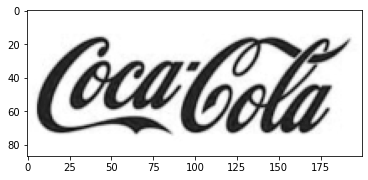

In [2]:
template = cv.imread('pattern.png',0)
plt.imshow(template,cmap='gray')
template=cv.resize(template,dsize=(int(template.shape[1]/2),int(template.shape[0]/2)),interpolation = cv.INTER_AREA)
plt.imshow(template,cmap='gray' )
(tH, tW) = template.shape[:2]

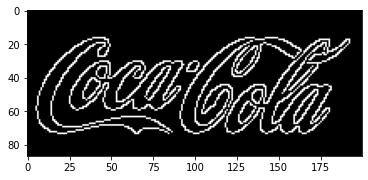

In [3]:
template_edges = cv.Canny(template, 50, 200)

plt.imshow(template_edges, cmap="gray")
plt.show()

In [4]:
template=template_edges
threshold = 0.65
w, h = template.shape[::-1]

# Punto 1

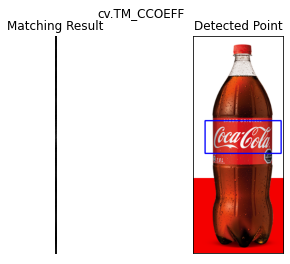

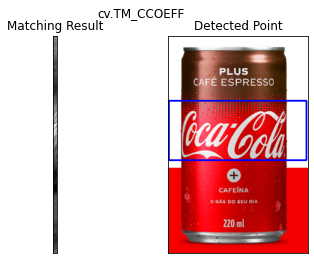

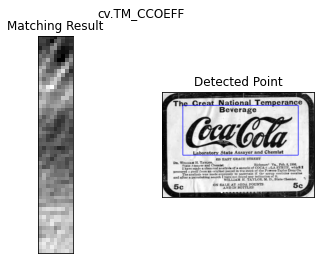

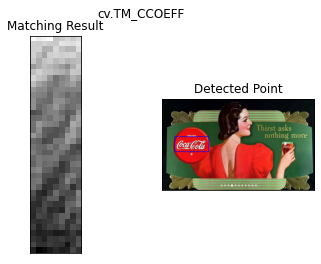

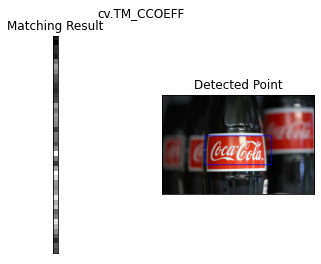

In [5]:
#https://pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/
imagenes=["coca_logo_1.png","coca_logo_2.png","coca_retro_1.png","coca_retro_2.png","logo_1.png"]

methods = ['cv.TM_CCOEFF']


for imagen in imagenes:
  img = cv.imread(imagen)
  img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  found = None


  for scale in np.linspace(0.01, 2, 100)[::-1]:
  
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale))
    r = img_gray.shape[1] / float(resized.shape[1])
    if resized.shape[0] < tH or resized.shape[1] < tW:
      break

    for meth in methods:
        img_salida = img_rgb.copy()
        
        method = eval(meth)
        edged = cv.Canny(resized, 50, 200)
        result = cv.matchTemplate(edged, template, method)
        
        
        (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)     
        if found is None or maxVal > found[0]:
          found = (maxVal, maxLoc, r)

  (_, maxLoc, r) = found
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

  cv.rectangle(img_salida, (startX, startY), (endX, endY), (0, 0, 255), 2)
  

      
      
  # Resultado de coincidencia
  plt.subplot(121),plt.imshow(result,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
      
  # Imagen original con recuadros
  plt.subplot(122),plt.imshow(img_salida)
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
      
  plt.suptitle(meth)
  plt.show()

#Punto 2

In [6]:
def intersects( a,b):#non max suppresion opencv
  return not (a[2] < b[0] or a[0] > b[2] or a[3] < b[1] or a[1] > b[3])

In [7]:

imagenes=["coca_multi.png"]

methods = ['cv.TM_CCOEFF']

for imagen in imagenes:
  img = cv.imread(imagen)
  img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  found = None
  img_salida=img_rgb.copy()

  located=[]
  for scale in np.linspace(1, 3, 100)[::-1]: 
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale))
    r = img_gray.shape[1] / float(resized.shape[1])
    edged = cv.Canny(resized, 50, 200)
    result = cv.matchTemplate(edged, template, cv.TM_CCOEFF)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
    loc = np.where(result/(maxVal-minVal) >= threshold)
    for location in zip(*loc[::-1]):          
      (startX, startY) = (int(location[0] * r), int(location[1] * r))
      (endX, endY) = (int((location[0] + tW) * r), int((location[1] + tH) * r))
      located.append([startX, startY,endX, endY])
      #cv.rectangle(img_salida, (startX, startY), (endX, endY),(0, 0, 255), 2)
      found=True
  
        
  

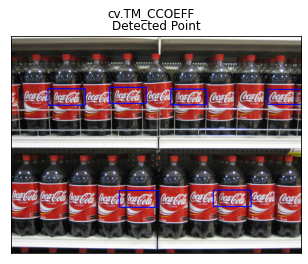

In [8]:
finalLocs=[]
for iA in range(len(located)):
  locA=located[iA]
  if(iA==0):
    finalLocs.append(locA)
  else:
    intersect=False
    for iB in range(iA+1,len(located)):
      locB=located[iB]
      if(intersects(locA,locB)):
        intersect=True
        break
    if(intersect==False ):
      finalLocs.append(locA)
      cv.rectangle(img_salida, (locA[0], locA[1]), (locA[2], locA[3]),(0, 0, 255), 2)
  
plt.imshow(img_salida)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     
plt.suptitle(meth)
plt.show()

# Punto 3

In [10]:
def intersectsv2( a,b):#non max suppresion opencv
  return not (a[2] < b[0] or a[0] > b[2] or a[3] < b[1] or a[1] > b[3]) or (a[0] >= b[0] and a[1] <= b[1] and a[2] >= b[2] and a[3] <= b[3])

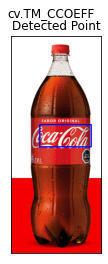

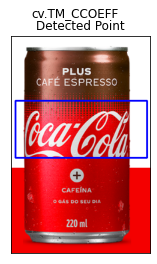

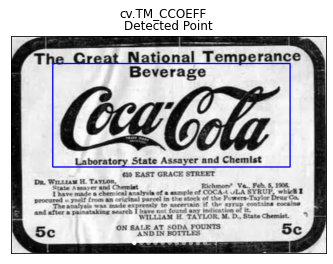

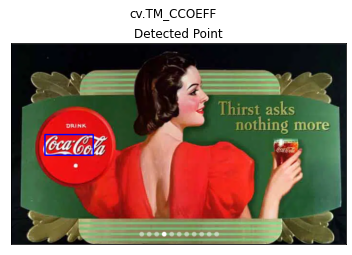

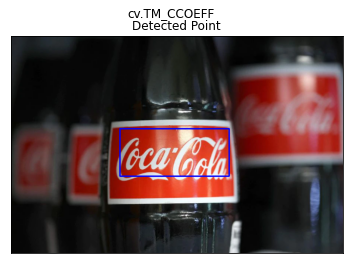

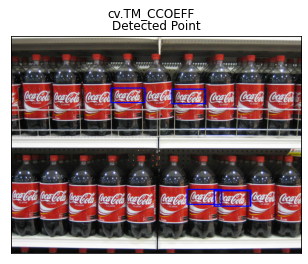

In [11]:
#A este algoritmo le falta un poco de trabajo, No es perfecto, pero detecta bastante bien
imagenes=["coca_logo_1.png","coca_logo_2.png","coca_retro_1.png","coca_retro_2.png","logo_1.png","coca_multi.png"]

methods = ['cv.TM_CCOEFF']

for imagen in imagenes:
  img = cv.imread(imagen)
  img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  found = None
  img_salida=img_rgb.copy()

  located=[]
  for scale in np.linspace(0.01, 3, 100)[::-1]: 
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale))
    r = img_gray.shape[1] / float(resized.shape[1])
    edged = cv.Canny(resized, 50, 200)
    if resized.shape[0] < tH or resized.shape[1] < tW:
      break
    result = cv.matchTemplate(edged, template, cv.TM_CCOEFF)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
    loc = np.where(result/(maxVal-minVal) >= threshold)
    for location in zip(*loc[::-1]):          
      (startX, startY) = (int(location[0] * r), int(location[1] * r))
      (endX, endY) = (int((location[0] + tW) * r), int((location[1] + tH) * r))
      located.append([startX, startY,endX, endY])
      #cv.rectangle(img_salida, (startX, startY), (endX, endY),(0, 0, 255), 2)
      found=True

  finalLocs=[]
  located=sorted(located,key=lambda a: ((a[2]-a[0])*(a[3]-a[1])),reverse=False)
  for iA in range(len(located)):
    locA=located[iA]
    if(iA==0):
      finalLocs.append(locA)
    else:
      intersect=False
      for iX in range(len(finalLocs)):
        locX=located[iX]
        if(intersectsv2(locX,locA)):
          intersect=True
          break
      if(intersect==False ):
        finalLocs.append(locA)
        
  
  if(len(finalLocs)==0):
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

    cv.rectangle(img_salida, (startX, startY), (endX, endY), (0, 0, 255), 2)
  else:
    for locA in finalLocs:
      cv.rectangle(img_salida, (locA[0], locA[1]), (locA[2], locA[3]),(0, 0, 255), 2)
    
  plt.imshow(img_salida)
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
      
  plt.suptitle(meth)
  plt.show()
  
        
  